# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

df2 = pd.read_csv("ca_dds_expenditures.csv")
df2

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


In [2]:
# Selecting the columns which are of interest
#df2[['Id','Age Cohort','Expenditures', 'Ethnicity']]

#Get names of indexes for which column Ethnicity is other than 'Hispanic' and 'White not Hispanic'
#indexEthnicity = df2[(df2['Ethnicity'] == 'Multi Race')].index
#indexEthnicity = df2[(df2['Ethnicity'] == 'Asian')].index
#indexEthnicity = df2[(df2['Ethnicity'] == 'Black')].index
#indexEthnicity = df2[(df2['Ethnicity'] == 'Other')].index
#indexEthnicity = df2[(df2['Ethnicity'] == 'Native Hawaiian')].index
#indexEthnicity = df2[(df2['Ethnicity'] == 'American Indian')].index

#Delete all rows with column "Ethnicity" being anything other than Hispanic and White not Hispanic
#df2.drop(indexEthnicity , inplace=True)
#df2
table0 = df2[(df2.Ethnicity == 'Hispanic') | (df2.Ethnicity == 'White not Hispanic')].pivot_table(values='Expenditures', index=['Ethnicity'], columns=[], aggfunc=np.mean)



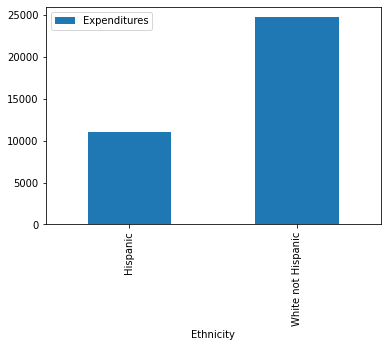

In [3]:
#df2.groupby('Ethnicity')['Expenditures'].mean().plot.pie()
table0.plot.bar()


According to the above visualization, the average expandure for the Hispanic people is about $10,000 on average. Meanwhile, the average expenditure for the 'White not Hispanic' Ethnicity people is just about $24,900.

**YOUR EXPLANATION HERE**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

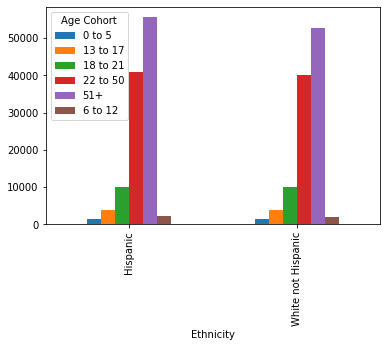

In [4]:
table = df2[(df2.Ethnicity == 'Hispanic') | (df2.Ethnicity == 'White not Hispanic')].pivot_table(values='Expenditures', index=['Ethnicity'], columns=['Age Cohort'], aggfunc=np.mean)
table.plot.bar()

#table = pd.pivot_table(df2[df2.Ethnicity == 'Hispanic'] , values='Expenditures', index=['Ethnicity'], columns=['Age Cohort'], aggfunc=np.mean)
#table.plot.bar()




According to this visualization, the people between the age bracket of 51+, for both the communities, have clearly a higher average expenditure in contrast to the people of other age cohorts. Followed by the people in the age cohort 22-50 and so on. The results of this question contradicts the visualizations of that in the question 1 that the average expenditure is not really affected by the ethnicity but rather there is a more strong relationship between the age cohort and the average expenditure.

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

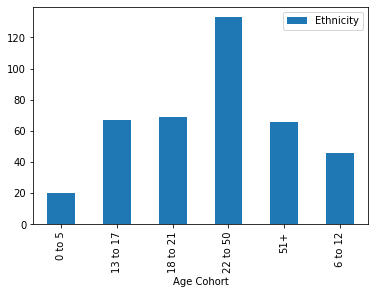

In [5]:
#Distribution among age groups within white not hispanic ethnicity
table = df2[(df2.Ethnicity == 'White not Hispanic')].pivot_table(values='Ethnicity', index=['Age Cohort'], columns=[], aggfunc=np.size)
table.plot.bar()

The above visualization shows that there is a higher number of population in the 22 to 50 age cohort for the people of 'White not Hisapnic' ethnicity.

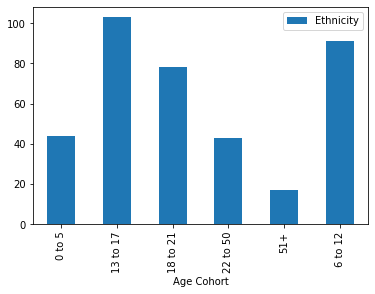

In [6]:
#Distribution among age groups within the Hispanic ethnicity.
table = df2[(df2.Ethnicity == 'Hispanic')].pivot_table(values='Ethnicity', index=['Age Cohort'], columns=[], aggfunc=np.size)
table.plot.bar()

The above visualization shows that there is a higher number of population in the 13 to 17 age cohort for the people of
'Hisapnic' ethnicity. 

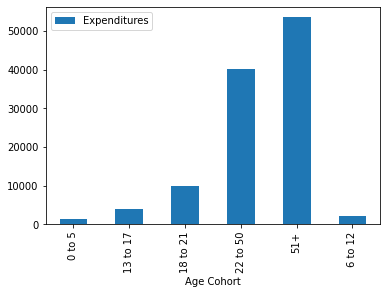

In [7]:
#Average Expenditures for each age group despite the Ethnicity
table = df2[(df2.Ethnicity == 'Hispanic') | (df2.Ethnicity == 'Asian') | (df2.Ethnicity == 'Multi Race') | (df2.Ethnicity == 'Black') | (df2.Ethnicity == 'Other') | (df2.Ethnicity == 'American Indian') | (df2.Ethnicity == 'Native Hawaiian') | (df2.Ethnicity == 'White not Hispanic')].pivot_table(values='Expenditures', index=['Age Cohort'], columns=[], aggfunc=np.mean)
table.plot.bar()


The above visualization shows the comparison of average expenditure in the different age cohorts despite the ethnicity.
This data shows that the people in the age cohorts of 51+, followed by the people in the age cohort of 22-50 have a
considerable higher expenditure than those in other age cohorts.

According to all the above visualizations, we can conclude that there is a larger population of white not hispanic people in the age cohorts of 21 and higher who have a higher average expenditure in comparison to the 'Hispanic' people. Other than that, if we dont take the ethnicity into account, we can see that the people in the age cohort of 51+ have the highest average expenditure.

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows: Upload notebook (ipynb) iLearn.